In [ ]:
# !pip install Basemap
# !pip install basemap-data-hires

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

In [6]:
import pandas as pd

excel_file = "./data/Visit&Booking.xlsx"

raw_visits = pd.read_excel(excel_file, sheet_name="Visit Raw data")
raw_bookings = pd.read_excel(excel_file, sheet_name="Booking Raw")
bookings_filtered = pd.read_excel(excel_file, sheet_name="Love2Test_appointment_1")

# VISITS

In [7]:
raw_visits.keys()

Index(['clinic_id', 'country_id', 'province_id', 'hashed_ip', 'source',
       'client', 'from_url', 'location', 'created_at'],
      dtype='object')

In [ ]:
raw_visits['Year'] = raw_visits['created_at'].dt.year
raw_visits['Month'] = raw_visits['created_at'].dt.month
raw_visits['Day'] = raw_visits['created_at'].dt.day
raw_visits['Time'] = raw_visits['created_at'].dt.time

raw_visits.head()

In [9]:
len(raw_visits)

321129

In [10]:
visits_filtered = raw_visits.drop_duplicates(subset=['hashed_ip', 'Month'], keep='first')

bot_indicators = ['bot', 'crawler', 'spider', 'facebookexternalhit', 'Googlebot']
visits_filtered = visits_filtered[~visits_filtered['client'].str.contains('|'.join(bot_indicators), case=False, na=False)]

len(visits_filtered)

158639

In [11]:
visits_filtered.keys()

Index(['clinic_id', 'country_id', 'province_id', 'hashed_ip', 'source',
       'client', 'from_url', 'location', 'created_at', 'Year', 'Month', 'Day',
       'Time'],
      dtype='object')

In [9]:
visits_filtered.to_excel('visits_filtered.xlsx')

In [10]:
# prompt: visits_filtered['location'] count word contains Chon or chon

import pandas as pd

# Assuming visits_filtered is already defined from the previous code

chon_count = visits_filtered['location'].str.contains('Chon Buri|chonburi|Chon buri|phataya', case=False, na=False).sum()
print(f"Number of locations containing 'Chon' or 'chon': {chon_count}")


Number of locations containing 'Chon' or 'chon': 881


In [11]:
visits_filtered_Thailand = visits_filtered[visits_filtered['location' ].str.contains('Thailand', case=False, na=False)]

# Now visits_filtered_Thailand contains only rows where the 'location' column
# contains the substring "Thailand" (case-insensitive), excluding NaN values.

# Example: Print the number of rows in the new DataFrame.
print(f"Number of visits from Thailand: {len(visits_filtered_Thailand)}")


Number of visits from Thailand: 134423


In [12]:
visits_filtered_Thailand[['Country', 'Province', 'Postal Code']] = visits_filtered_Thailand['location'].str.split(',', expand=True, n=2)

visits_filtered_Thailand['Country'] = visits_filtered_Thailand['Country'].fillna('')
visits_filtered_Thailand['Province'] = visits_filtered_Thailand['Province'].fillna('')
visits_filtered_Thailand['Postal Code'] = visits_filtered_Thailand['Postal Code'].fillna('')


<ipython-input-12-2e089dec7070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_filtered_Thailand[['Country', 'Province', 'Postal Code']] = visits_filtered_Thailand['location'].str.split(',', expand=True, n=2)
<ipython-input-12-2e089dec7070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_filtered_Thailand[['Country', 'Province', 'Postal Code']] = visits_filtered_Thailand['location'].str.split(',', expand=True, n=2)
<ipython-input-12-2e089dec7070>:1: SettingWithCopyWarning: 
A value is tryin

In [13]:
postalcodesinfo_df = pd.read_csv("/content/PostalCode_Provinces.csv")

In [14]:
postalcodesinfo_df.keys()

Index(['PostCode', 'ProvinceThai'], dtype='object')

In [15]:
# postalcodesinfo_df['ProvinceThai']
postalcodesinfo_df['PostCode'] = postalcodesinfo_df['PostCode'].astype(str)

postal2province = postalcodesinfo_df.set_index('PostCode')['ProvinceThai'].to_dict()
postal2province

{'10100': 'กรุงเทพมหานคร',
 '10110': 'กรุงเทพมหานคร',
 '10120': 'กรุงเทพมหานคร',
 '10130': 'สมุทรปราการ',
 '10140': 'กรุงเทพมหานคร',
 '10150': 'กรุงเทพมหานคร',
 '10160': 'กรุงเทพมหานคร',
 '10170': 'กรุงเทพมหานคร',
 '10200': 'กรุงเทพมหานคร',
 '10210': 'กรุงเทพมหานคร',
 '10220': 'กรุงเทพมหานคร',
 '10230': 'กรุงเทพมหานคร',
 '10240': 'กรุงเทพมหานคร',
 '10250': 'กรุงเทพมหานคร',
 '10260': 'กรุงเทพมหานคร',
 '10270': 'สมุทรปราการ',
 '10280': 'สมุทรปราการ',
 '10290': 'สมุทรปราการ',
 '10300': 'กรุงเทพมหานคร',
 '10303': 'กรุงเทพมหานคร',
 '10310': 'กรุงเทพมหานคร',
 '10330': 'กรุงเทพมหานคร',
 '10400': 'กรุงเทพมหานคร',
 '10500': 'กรุงเทพมหานคร',
 '10510': 'กรุงเทพมหานคร',
 '10520': 'กรุงเทพมหานคร',
 '10530': 'กรุงเทพมหานคร',
 '10540': 'สมุทรปราการ',
 '10550': 'สมุทรปราการ',
 '10560': 'สมุทรปราการ',
 '10570': 'สมุทรปราการ',
 '10600': 'กรุงเทพมหานคร',
 '10700': 'กรุงเทพมหานคร',
 '10800': 'กรุงเทพมหานคร',
 '10900': 'กรุงเทพมหานคร',
 '11000': 'นนทบุรี',
 '11110': 'นนทบุรี',
 '11120': 'นนทบุรี',
 '11130'

In [16]:
# Ensure 'Postal Code' is string
visits_filtered_Thailand['Postal Code'] = visits_filtered_Thailand['Postal Code'].str.replace(" ", "", regex=True)

# Map 'Postal Code' to 'Province' using the dictionary
visits_filtered_Thailand['Province'] = visits_filtered_Thailand['Postal Code'].map(postal2province)


<ipython-input-16-c831da513623>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_filtered_Thailand['Postal Code'] = visits_filtered_Thailand['Postal Code'].str.replace(" ", "", regex=True)
<ipython-input-16-c831da513623>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_filtered_Thailand['Province'] = visits_filtered_Thailand['Postal Code'].map(postal2province)


In [17]:
provinceThai2Eng = pd.read_csv("/content/ProvinceThai2Eng.csv")

In [18]:
provinceThai2EngDict = dict(zip(provinceThai2Eng['ProvinceThai'], provinceThai2Eng['ProvinceEng']))


In [19]:
# prompt: provinceThai2EngDict province_counts add 'ProvinceNameEng' to province_counts base on ThaiName

province_counts = visits_filtered_Thailand['Province'].value_counts().reset_index()
province_counts.columns = ['ProvinceThai', 'Count']

# Add 'ProvinceNameEng' column based on 'ProvinceThai' using the dictionary
province_counts['ProvinceNameEng'] = province_counts['ProvinceThai'].map(provinceThai2EngDict)

province_counts

,ProvinceThai,Count,ProvinceNameEng
0,กรุงเทพมหานคร,91124,Bangkok
1,เชียงใหม่,6507,Chiang Mai
2,ชลบุรี,3727,Chonburi
3,นครราชสีมา,3122,Nakhon Ratchasima
4,นนทบุรี,2530,Nonthaburi
...,...,...,...
71,อุทัยธานี,16,Uthai Thani
72,พังงา,14,Phang Nga
73,ชัยนาท,10,Chai Nat
74,ระนอง,5,Ranong


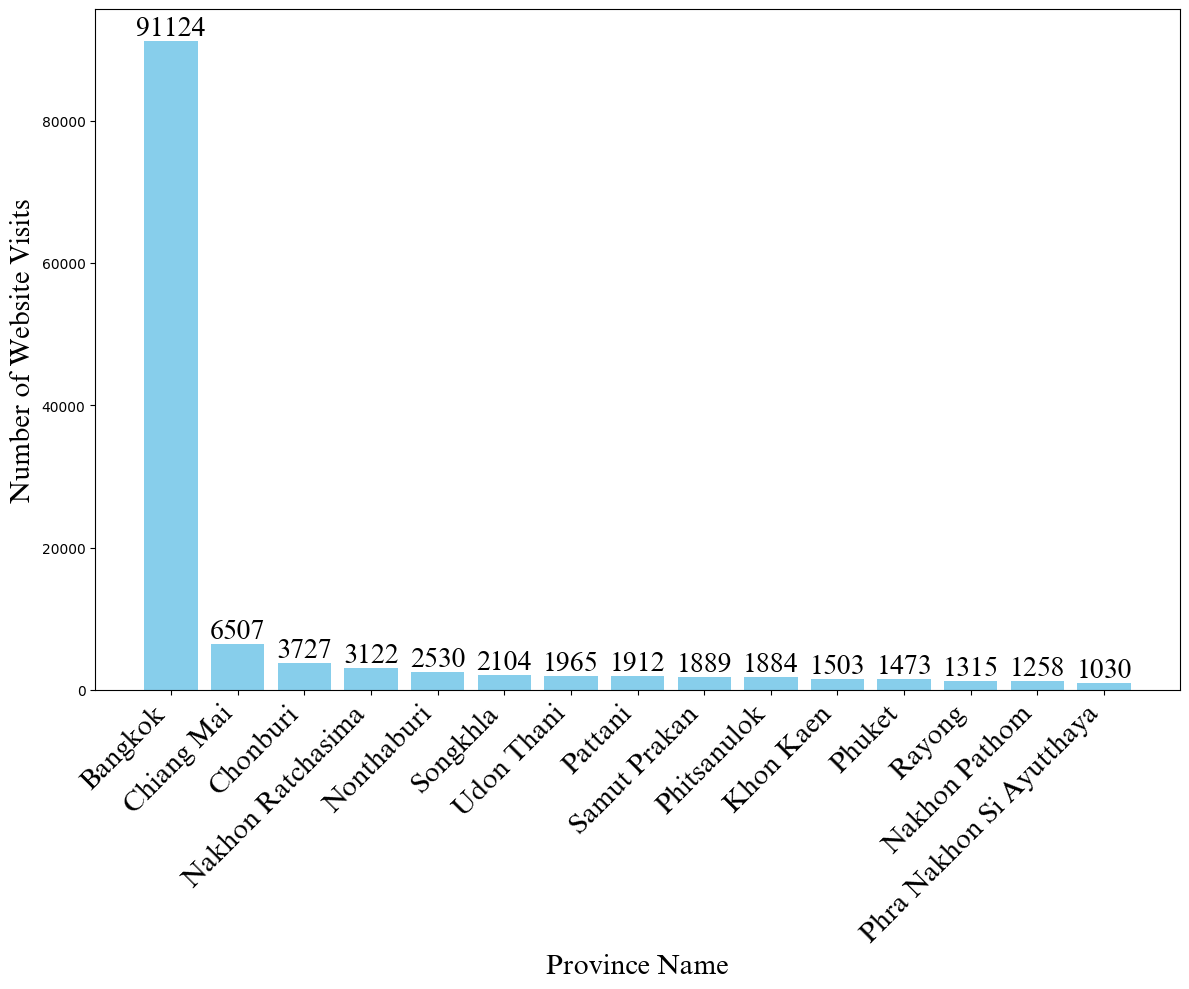

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define custom font properties
font_path = '/content/drive/MyDrive/Health Service Recommendations/Booking July 2024 /Data Analysis/Times New Roman/times new roman.ttf'
font_prop = FontProperties(fname=font_path, size=20)  # Increased font size

# Sample DataFrame (Ensure this exists in your actual dataset)
# Replace this with your actual DataFrame
# province_counts = pd.DataFrame({'ProvinceNameEng': ['Bangkok', 'Chiang Mai', 'Phuket'], 'Count': [100, 80, 60]})

# Sort the DataFrame by 'Count' in descending order
province_counts = province_counts.sort_values(by='Count', ascending=False)

# Get the top 20 provinces
top_provinces = province_counts.head(15)

# Create the bar chart
plt.figure(figsize=(12, 10))
bars = plt.bar(top_provinces['ProvinceNameEng'], top_provinces['Count'], color='skyblue')

plt.xlabel('Province Name', fontproperties=font_prop)
plt.ylabel('Number of Website Visits', fontproperties=font_prop)
# plt.title('Top 20 Provinces by Visit Count', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right', fontproperties=font_prop)  # Rotate x-axis labels

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [21]:
# visits_filtered_Thailand.to_csv('websitevisits.csv')

In [22]:
# # prompt: visits_filtered['location'] is of the form country, province, code Count unique province by split

# visits_filtered['province'] = visits_filtered['location'].str.split(',').str[1]
# unique_provinces = visits_filtered['province'].nunique()
# print(f"The number of unique provinces is: {unique_provinces}")

The number of unique provinces is: 2544


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties

# # Define custom font properties
# font_path = '/content/drive/MyDrive/Health Service Recommendations/Booking July 2024 /Data Analysis/Times New Roman/times new roman.ttf'
# font_prop = FontProperties(fname=font_path, size=18)  # Increased font size

# # Assuming visits_filtered DataFrame is already created
# visits_filtered['province'] = visits_filtered['location'].str.split(',').str[1]

# # Get the top 15 provinces
# province_counts = visits_filtered['province'].value_counts().head(20)

# # Create the plot
# plt.figure(figsize=(14, 7))
# bars = plt.bar(province_counts.index, province_counts.values, color='skyblue')

# # Labels and title with increased font size
# plt.xlabel("Province", fontsize=25, fontproperties=font_prop)
# plt.ylabel("Number of Visits", fontsize=25, fontproperties=font_prop)
# plt.title("Top 20 Provinces with the Most Website Visits", fontsize=30, fontproperties=font_prop)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right', fontsize=25, fontproperties=font_prop)
# plt.yticks(fontsize=25, fontproperties=font_prop)

# # Add counts on top of each bar with a larger font size
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval}",
#              ha='center', va='bottom', fontsize=14, fontproperties=font_prop)

# # Adjust layout to prevent overlapping
# plt.tight_layout()
# plt.show()


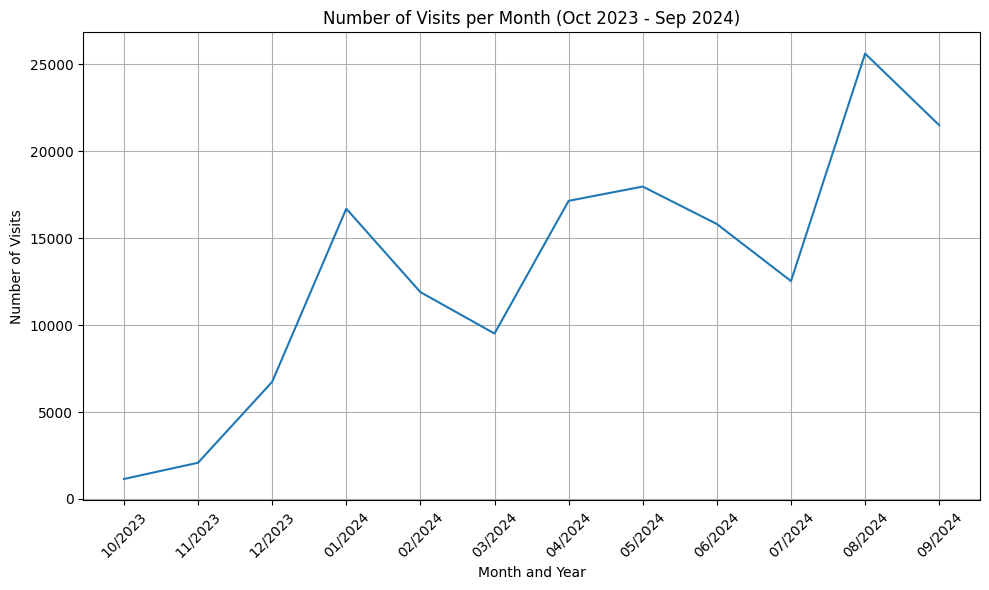

In [24]:
# prompt: plot visits base on month by counting each month and year start from 10-2023 to 9-2024

import matplotlib.pyplot as plt

# Filter visits for the specified period
visits_filtered = visits_filtered[((visits_filtered['Year'] == 2023) & (visits_filtered['Month'] >= 10)) |
                         ((visits_filtered['Year'] == 2024) & (visits_filtered['Month'] <= 9))]

# Group by month and year and count the visits
visits_by_month = visits_filtered.groupby(['Year', 'Month'])['ip'].count()

# Create a plot
plt.figure(figsize=(10, 6))

# Correct index for plotting
visits_by_month.index = visits_by_month.index.map(lambda x: f'{x[1]:02d}/{x[0]}')

plt.plot(visits_by_month.index, visits_by_month.values)
plt.xlabel('Month and Year')
plt.ylabel('Number of Visits')
plt.title('Number of Visits per Month (Oct 2023 - Sep 2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# BOOKINGS

In [25]:
raw_bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'Services', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [26]:
# prompt: raw_bookings[['Services', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']] put them as a list if it is not NaN in new column of rawbooking

import pandas as pd
import numpy as np

def combine_services(row):
  services_list = []
  for col in ['Services', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']:
    if not pd.isna(row[col]):
      services_list.append(row[col])

  return list(services_list) if services_list else np.nan

raw_bookings['All Services'] = raw_bookings.apply(combine_services, axis=1)

raw_bookings

In [28]:
# prompt: Only take Appointment Date	Created At	Clinic	Province	Age	Gender and Combined Services and make it to bookings

# Assuming 'raw_bookings' DataFrame is already created as in the provided code.

# Select the desired columns and rename 'Combined Services'
bookings = raw_bookings[['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender', 'All Services']].copy()

In [29]:
available_services = set()  # Initialize as a set, not a dictionary

for services in bookings['All Services']:
    if isinstance(services, (list, set)):  # Ensure 'services' is iterable
        available_services = available_services.union(set(services))
    else:
        print(f"Unexpected data type: {services}")

In [30]:
services_columns = available_services

# Add the new columns with default value 0
for service in services_columns:
    bookings[service] = 0

# Iterate through each row and update columns based on the list of services booked
for idx, row in bookings.iterrows():
    for service in row['All Services']:
        if service in services_columns:
            bookings.at[idx, service] = 1


In [31]:
bookings['Province'].unique()

array(['Songkhla', 'Bangkok', 'Chon Buri', 'Khon Kaen', 'Udon Thani',
       'Chiang Mai', 'Ubon Ratchathani', 'Phitsanulok',
       'Nakhon Ratchasima', 'Chiang Rai', 'Phuket', 'Surat Thani',
       'Rayong', 'Phayao', 'Nakhon Sawan', 'Nakhon Pathom'], dtype=object)

In [32]:
bookings['Gender'].unique()

array(['Male', 'Non-Binary: Male by birth', 'Prefer not to answer',
       'Female', 'Transgender: Transwoman', 'Non-Binary: Female by birth',
       'Transgender: Transman'], dtype=object)

In [33]:
province_mapping = {
    'Songkhla': 0, 'Bangkok': 1, 'Chon Buri': 2, 'Khon Kaen': 3, 'Udon Thani': 4,
    'Chiang Mai': 5, 'Ubon Ratchathani': 6, 'Phitsanulok': 7, 'Nakhon Ratchasima': 8,
    'Chiang Rai': 9, 'Phuket': 10, 'Surat Thani': 11, 'Rayong': 12, 'Phayao': 13,
    'Nakhon Sawan': 14, 'Nakhon Pathom': 15
}

gender_mapping = {
    'Male': 0, 'Non-Binary: Male by birth': 1, 'Prefer not to answer': 2,
    'Female': 3, 'Transgender: Transwoman': 4, 'Non-Binary: Female by birth': 5,
    'Transgender: Transman': 6
}

In [34]:
bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'All Services', 'Hormone Testing', 'PEP', 'STIs Screening',
       'HIV Testing', 'STIs Treatment', 'PrEP'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['Province', 'Age', 'Gender', 'PrEP', 'Hormone Testing', 'HIV Testing', 'STIs Screening', 'PEP', 'STIs Treatment']

province_mapping = {province: i for i, province in enumerate(bookings['Province'].unique())}
bookings['Province_encoding'] = bookings['Province'].map(province_mapping)

province_mapping = {province: i for i, province in enumerate(bookings['Province'].unique())}
bookings['Gender_encoding'] = bookings['Gender'].map(gender_mapping)

features = ['Province_encoding', 'Age', 'Gender_encoding', 'PrEP', 'Hormone Testing', 'HIV Testing', 'STIs Screening', 'PEP', 'STIs Treatment']


# Standardize the data
scaler = StandardScaler()


data_scaled = scaler.fit_transform(bookings[features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
bookings['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
bookings.head()

In [36]:
bookings_filtered.keys()

Index(['Appointment Date', 'Clinic', 'Province', 'Age', 'Gender', 'Services',
       ' ', ' .1', ' .2', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'HIV Testing', 'PrEP', 'STIs Screening', 'PEP',
       'STIs Treatment', 'Hormone Testing'],
      dtype='object')

In [ ]:
raw_bookings['Year'] = raw_bookings['Appointment Date'].dt.year
raw_bookings['Month'] = raw_bookings['Appointment Date'].dt.month
raw_bookings['Day'] = raw_bookings['Appointment Date'].dt.day
raw_bookings['Time'] = raw_bookings['Appointment Date'].dt.time

raw_bookings.head()

In [38]:
# prompt: raw_bookings gender count distinct

# Count distinct genders in raw_bookings
gender_counts = raw_bookings['Gender'].value_counts()
gender_counts

,count
Gender,
Male,5339
Non-Binary: Male by birth,1472
Female,1368
Prefer not to answer,285
Transgender: Transman,281
Transgender: Transwoman,203
Non-Binary: Female by birth,17


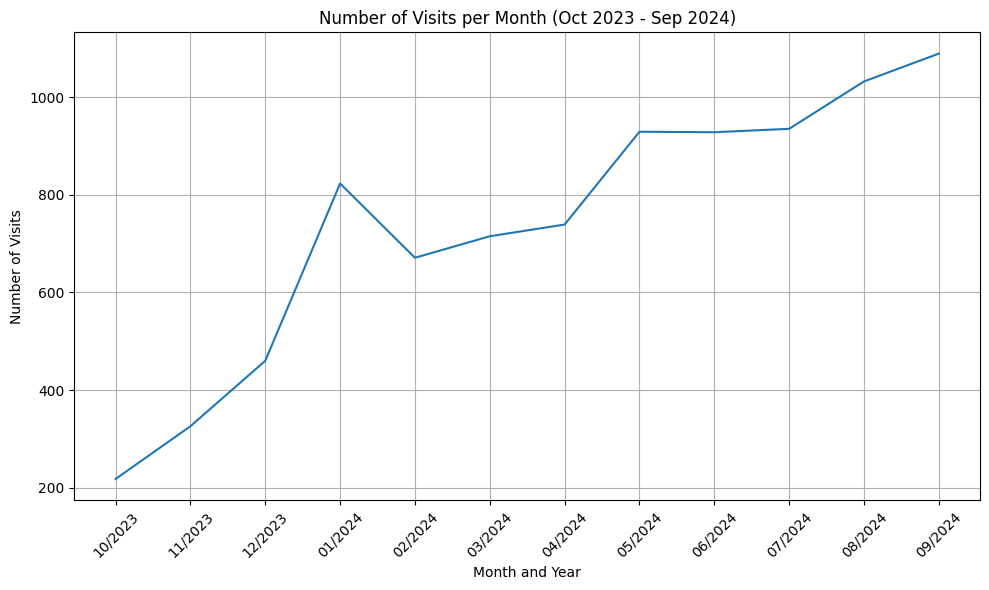

In [39]:
# prompt: plot visits base on month by counting each month and year start from 10-2023 to 9-2024

import matplotlib.pyplot as plt

# Filter bookings for the specified period
bookings_filtered = raw_bookings[((raw_bookings['Year'] == 2023) & (raw_bookings['Month'] >= 10)) |
                         ((raw_bookings['Year'] == 2024) & (raw_bookings['Month'] <= 9))]

# Group by month and year and count the visits
bookings_by_month = bookings_filtered.groupby(['Year', 'Month'])['Appointment Date'].count()

# Create a plot
plt.figure(figsize=(10, 6))

# Correct index for plotting
bookings_by_month.index = bookings_by_month.index.map(lambda x: f'{x[1]:02d}/{x[0]}')

plt.plot(bookings_by_month.index, bookings_by_month.values)
plt.xlabel('Month and Year')
plt.ylabel('Number of Visits')
plt.title('Number of Visits per Month (Oct 2023 - Sep 2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Define the custom order of gender categories
gender_order = [
    'Male',
    'Female',
    'Transgender: Transman',
    'Transgender: Transwoman',
    'Non-Binary: Male by birth',
    'Non-Binary: Female by birth',
    'Prefer not to answer'
]

# Count the occurrences of each gender
summary_df = bookings_filtered['Gender'].value_counts().reindex(gender_order).reset_index()
summary_df.columns = ['Gender', 'Count']

# Display the sorted summary
summary_df

,Gender,Count
0,Male,5285
1,Female,1350
2,Transgender: Transman,276
3,Transgender: Transwoman,200
4,Non-Binary: Male by birth,1454
5,Non-Binary: Female by birth,17
6,Prefer not to answer,283


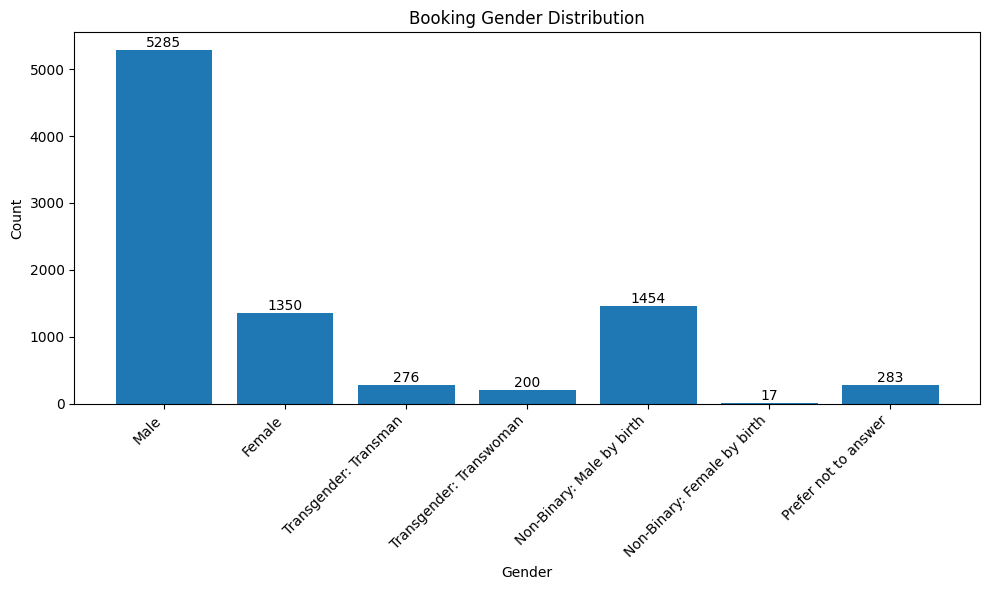

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(summary_df['Gender'], summary_df['Count'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Booking Gender Distribution')
plt.xticks(rotation=45, ha='right')

# Add the count on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

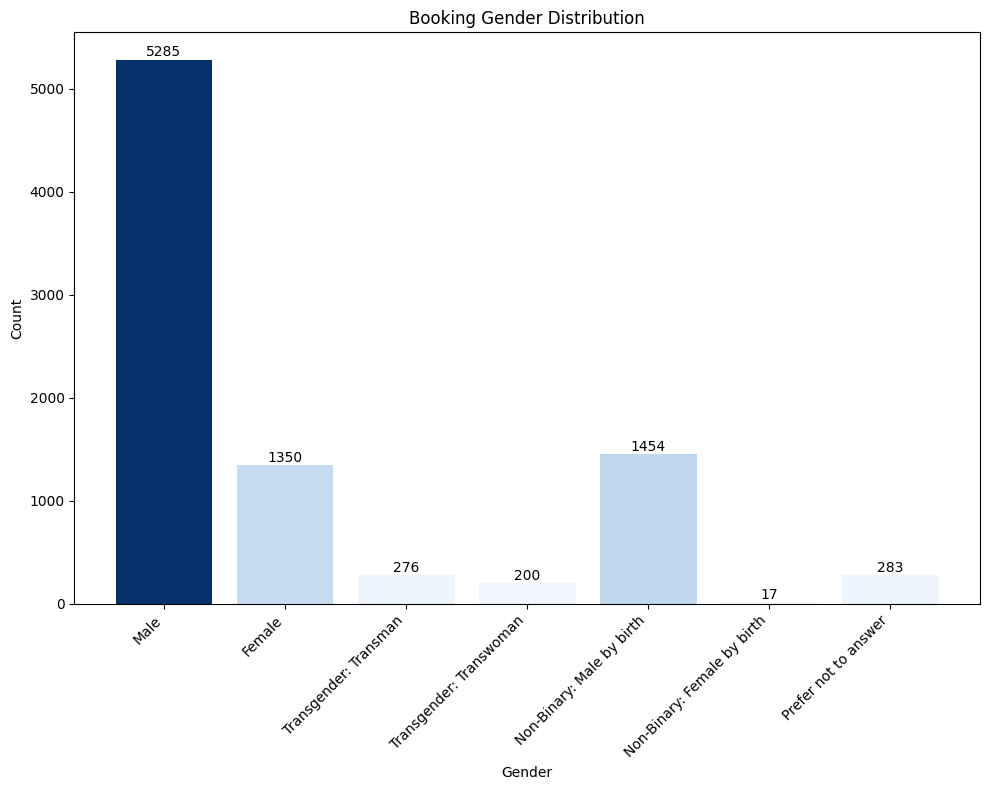

In [42]:
import matplotlib.pyplot as plt
import numpy as np

norm = plt.Normalize(summary_df['Count'].min(), summary_df['Count'].max())

colors = plt.cm.Blues(norm(summary_df['Count']))

plt.figure(figsize=(10, 8))
bars = plt.bar(summary_df['Gender'], summary_df['Count'], color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Booking Gender Distribution')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [43]:
bookings_filtered = pd.read_excel(excel_file, sheet_name="Love2Test_appointment_1")

In [44]:
service_columns = ['HIV Testing', 'PrEP', 'STIs Screening', 'PEP', 'STIs Treatment', 'Hormone Testing']

bookings_filtered['Gender'] = pd.Categorical(bookings_filtered['Gender'], categories=gender_order, ordered=True)

# Group by 'Gender' and sum the service columns
summary_df = bookings_filtered.groupby('Gender')[service_columns].sum().reset_index()

# Sort based on the custom Gender order
summary_df = summary_df.sort_values('Gender')

# Display the sorted summary DataFrame
summary_df

<ipython-input-44-224ff1034786>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = bookings_filtered.groupby('Gender')[service_columns].sum().reset_index()


,Gender,HIV Testing,PrEP,STIs Screening,PEP,STIs Treatment,Hormone Testing
0,Male,4082,3161,3027,302,104,177
1,Female,1144,451,836,75,27,127
2,Transgender: Transman,208,138,145,23,2,36
3,Transgender: Transwoman,124,90,89,10,2,90
4,Non-Binary: Male by birth,1113,957,814,108,22,45
5,Non-Binary: Female by birth,15,4,11,3,0,2
6,Prefer not to answer,217,171,161,15,2,16


In [45]:
# Define the age bins and corresponding labels
age_bins = [15, 25, 35, 45, float('inf')]  # Defining the bins for the age ranges
age_labels = ['15-24', '25-34', '35-44', '45+']  # Labels for the bins

# Create a new column 'Age Range' based on the age bins
bookings_filtered['Age Range'] = pd.cut(bookings_filtered['Age'], bins=age_bins, labels=age_labels, right=False)



# Group by 'Age Range' and count the number of rows in each group
age_range_summary = bookings_filtered.groupby('Age Range').size().reset_index(name='Booking Count')

# Display the summary DataFrame
age_range_summary

<ipython-input-45-c96df5b7c39f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_summary = bookings_filtered.groupby('Age Range').size().reset_index(name='Booking Count')


,Age Range,Booking Count
0,15-24,2850
1,25-34,4172
2,35-44,1433
3,45+,410


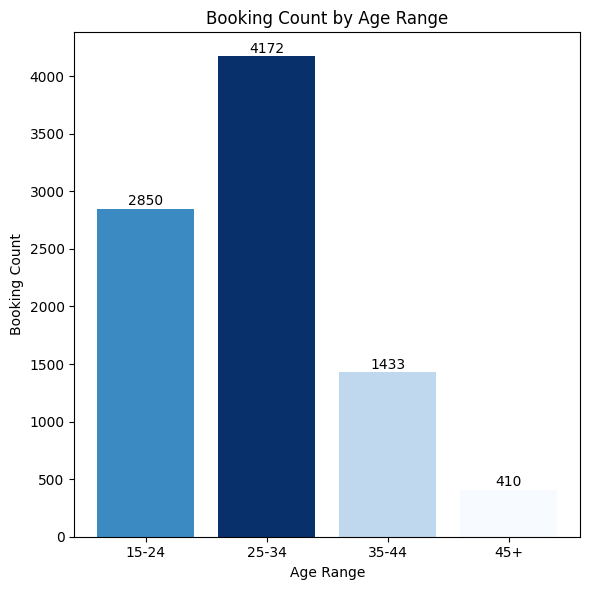

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Normalize the heights for color intensity
norm = plt.Normalize(age_range_summary['Booking Count'].min(), age_range_summary['Booking Count'].max())
colors = plt.cm.Blues(norm(age_range_summary['Booking Count']))
# Create the bar plot
plt.figure(figsize=(6, 6))
bars = plt.bar(age_range_summary['Age Range'], age_range_summary['Booking Count'], color=colors)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Booking Count')
plt.title('Booking Count by Age Range')

# Add the count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# COMBINES

In [47]:
len(bookings_filtered)

8865

In [48]:
len(visits_filtered)

158639

In [ ]:
raw_visits['Year'] = raw_visits['created_at'].dt.year
raw_visits['Month'] = raw_visits['created_at'].dt.month
raw_visits['Day'] = raw_visits['created_at'].dt.day
raw_visits['Time'] = raw_visits['created_at'].dt.time

raw_visits.head()

In [50]:
raw_bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'Services', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'All Services', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [ ]:
raw_bookings['Year'] = raw_bookings['Appointment Date'].dt.year
raw_bookings['Month'] = raw_bookings['Appointment Date'].dt.month
raw_bookings['Day'] = raw_bookings['Appointment Date'].dt.day
raw_bookings['Time'] = raw_bookings['Appointment Date'].dt.time

raw_bookings.head()

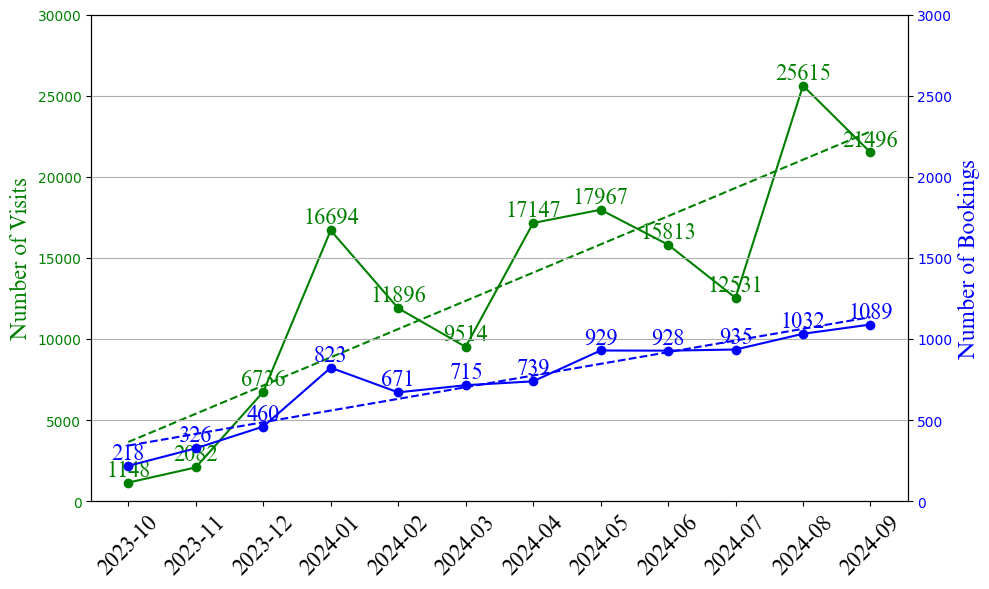

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import calendar
from matplotlib.font_manager import FontProperties

# Load the Times New Roman font from the specified file path
font_path = '/content/drive/MyDrive/Health Service Recommendations/Booking July 2024 /Data Analysis/Times New Roman/times new roman.ttf'
font_prop = FontProperties(fname=font_path, size=16)


# Filter visits and bookings for the specified period
bookings_filtered = raw_bookings[((raw_bookings['Year'] == 2023) & (raw_bookings['Month'] >= 10)) |
                                 ((raw_bookings['Year'] == 2024) & (raw_bookings['Month'] <= 9))]

visits_filtered = raw_visits[((raw_visits['Year'] == 2023) & (raw_visits['Month'] >= 10)) |
                         ((raw_visits['Year'] == 2024) & (raw_visits['Month'] <= 9))]

visits_filtered = raw_visits.drop_duplicates(subset=['ip', 'Month'], keep='first')

bot_indicators = ['bot', 'crawler', 'spider', 'facebookexternalhit', 'Googlebot']
visits_filtered = visits_filtered[~visits_filtered['client'].str.contains('|'.join(bot_indicators), case=False, na=False)]

# Group by month and year and count the bookings and visits
bookings_by_month = bookings_filtered.groupby(['Year', 'Month'])['Appointment Date'].count()
visits_by_month = visits_filtered.groupby(['Year', 'Month'])['ip'].count()

# Correct index for plotting in "Month, Year" format
# bookings_by_month.index = bookings_by_month.index.map(lambda x: f'{calendar.month_abbr[x[1]]} {x[0]}')
# visits_by_month.index = visits_by_month.index.map(lambda x: f'{calendar.month_abbr[x[1]]} {x[0]}')

bookings_by_month.index = bookings_by_month.index.map(lambda x: f'{x[0]:04d}-{x[1]:02d}')
visits_by_month.index = visits_by_month.index.map(lambda x: f'{x[0]:04d}-{x[1]:02d}')


# Generate numeric x-values for the trend line
x_values = np.arange(len(bookings_by_month))

# Calculate trend line for bookings
bookings_trend = np.polyfit(x_values, bookings_by_month.values, 1)
bookings_trend_line = np.polyval(bookings_trend, x_values)

# Calculate trend line for visits
visits_trend = np.polyfit(x_values, visits_by_month.values, 1)
visits_trend_line = np.polyval(visits_trend, x_values)

# Create the plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot visits on the left y-axis with dots and trend line
ax1.plot(visits_by_month.index, visits_by_month.values, color='g', marker='o', label='Visits')
ax1.plot(visits_by_month.index, visits_trend_line, color='g', linestyle='--', label='Visits Trend Line')
# ax1.set_xlabel('Month and Year', fontproperties=font_prop)
ax1.set_ylabel('Number of Visits', color='g', fontproperties=font_prop)
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_ylim(0, 30000)  # Set y-limit for visits

# Add numbers to the dots for visits, with the same color as the line
for i, value in enumerate(visits_by_month.values):
    ax1.annotate(f'{value}', (visits_by_month.index[i], value), textcoords="offset points", xytext=(0,5), ha='center', color='g', fontproperties=font_prop)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontproperties=font_prop)

# Create the second y-axis for bookings on the right
ax2 = ax1.twinx()
ax2.plot(bookings_by_month.index, bookings_by_month.values, color='b', marker='o', label='Bookings')
ax2.plot(bookings_by_month.index, bookings_trend_line, color='b', linestyle='--', label='Bookings Trend Line')
ax2.set_ylabel('Number of Bookings', color='b', fontproperties=font_prop)
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim(0, 3000)  # Set y-limit for bookings

# Add numbers to the dots for bookings, with the same color as the line
for i, value in enumerate(bookings_by_month.values):
    ax2.annotate(f'{value}', (bookings_by_month.index[i], value), textcoords="offset points", xytext=(0,5), ha='center', color='b', fontproperties=font_prop)

# Add title and formatting
# plt.title('Number of Visits and Bookings per Month (Oct 2023 - Sep 2024)', fontproperties=font_prop)
plt.grid(True)

fig.tight_layout()
plt.savefig('Figure1.png')
plt.show()


In [53]:
# Define a function to categorize ages into ranges
def categorize_age(age):
    if 15 <= age <= 24:
        return '15-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    else:
        return '45+'

# Define a dictionary to map each province to its region
province_to_region = {
    'Bangkok': 'Central',
    'Nakhon Pathom': 'Central',
    'Chiang Mai': 'Northern',
    'Chiang Rai': 'Northern',
    'Phayao': 'Northern',
    'Phitsanulok': 'Northern',
    'Nakhon Sawan': 'Northern',
    'Khon Kaen': 'Northeastern',
    'Nakhon Ratchasima': 'Northeastern',
    'Ubon Ratchathani': 'Northeastern',
    'Udon Thani': 'Northeastern',
    'Chon Buri': 'Eastern',
    'Rayong': 'Eastern',
    'Phuket': 'Southern',
    'Songkhla': 'Southern',
    'Surat Thani': 'Southern'
}

# Add a new 'Region' column based on the 'Province'
bookings_filtered['Region'] = bookings_filtered['Province'].map(province_to_region)

# Apply the categorization to the 'Age' column
bookings_filtered['Age Range'] = bookings_filtered['Age'].apply(categorize_age)

# Group by 'Region', 'Province', 'Age Range', and 'Gender', and count the number of appointments
appointment_counts = bookings_filtered.groupby(['Region', 'Province', 'Age Range', 'Gender']).size().astype(int).reset_index(name='Number of Appointments')
# appointment_counts = bookings_filtered.groupby(['Region', 'Province', 'Age Range']).size().astype(int).reset_index(name='Number of Appointments')

# Pivot the table to move 'Gender' to columns with counts as integers
pivoted_table = appointment_counts.pivot_table(index=['Region', 'Province', 'Age Range'], columns='Gender', values='Number of Appointments', fill_value=0).astype(int)

# Display the result
pivoted_table.to_csv('result5.csv')

<ipython-input-53-98287be874e2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_filtered['Region'] = bookings_filtered['Province'].map(province_to_region)
<ipython-input-53-98287be874e2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_filtered['Age Range'] = bookings_filtered['Age'].apply(categorize_age)


In [54]:
bookings_filtered = pd.read_excel(excel_file, sheet_name="Love2Test_appointment_1")
bookings_filtered.keys()

Index(['Appointment Date', 'Clinic', 'Province', 'Age', 'Gender', 'Services',
       ' ', ' .1', ' .2', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'HIV Testing', 'PrEP', 'STIs Screening', 'PEP',
       'STIs Treatment', 'Hormone Testing'],
      dtype='object')

In [55]:
# Define a function to categorize ages into ranges
def categorize_age(age):
    if 15 <= age <= 24:
        return '15-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    else:
        return '45+'

# Define a dictionary to map each province to its region
province_to_region = {
    'Bangkok': 'Central',
    'Nakhon Pathom': 'Central',
    'Chiang Mai': 'Northern',
    'Chiang Rai': 'Northern',
    'Phayao': 'Northern',
    'Phitsanulok': 'Northern',
    'Nakhon Sawan': 'Northern',
    'Khon Kaen': 'Northeastern',
    'Nakhon Ratchasima': 'Northeastern',
    'Ubon Ratchathani': 'Northeastern',
    'Udon Thani': 'Northeastern',
    'Chon Buri': 'Eastern',
    'Rayong': 'Eastern',
    'Phuket': 'Southern',
    'Songkhla': 'Southern',
    'Surat Thani': 'Southern'
}

# Add a new 'Region' column based on the 'Province'
bookings_filtered['Region'] = bookings_filtered['Province'].map(province_to_region)

# Apply the categorization to the 'Age' column
bookings_filtered['Age Range'] = bookings_filtered['Age'].apply(categorize_age)

# Group by 'Region', 'Province', and sum the service columns
service_columns = ['HIV Testing', 'PrEP', 'STIs Screening', 'PEP', 'STIs Treatment', 'Hormone Testing']
summary_df = bookings_filtered.groupby(['Region', 'Province'])[service_columns].sum().reset_index()

# Pivot the table to have 'Region' and 'Province' as rows and service columns
pivoted_table = summary_df.pivot_table(index=['Region', 'Province'],
                                       values=service_columns,
                                       aggfunc='sum')

# Display the result
pivoted_table.to_csv("XXXX.csv")


In [56]:
# Assuming categorize_age is a function that categorizes the age into different ranges
# Apply the age categorization
bookings_filtered['Age Range'] = bookings_filtered['Age'].apply(categorize_age)

# Convert 'Gender' to a categorical type with the specified order
bookings_filtered['Gender'] = pd.Categorical(bookings_filtered['Gender'], categories=gender_order, ordered=True)

# Group by 'Gender' and 'Age Range', and sum the service columns
summary_df = bookings_filtered.groupby(['Age Range', 'Gender'])[service_columns].sum().reset_index()

# Pivot the table to get 'Gender' and 'Age Range' as rows and services as columns
pivot_df = summary_df.pivot_table(index=['Age Range', 'Gender'],
                                  values=service_columns,
                                  aggfunc='sum')

# Display the pivot table
pivot_df.to_csv("AXBV.csv")


<ipython-input-56-76899517226a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = bookings_filtered.groupby(['Age Range', 'Gender'])[service_columns].sum().reset_index()
<ipython-input-56-76899517226a>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = summary_df.pivot_table(index=['Age Range', 'Gender'],


In [57]:
# Apply the categorization to the 'Age' column
bookings_filtered['Age Range'] = bookings_filtered['Age'].apply(categorize_age)

# Group by 'Region', 'Province', 'Age Range', and 'Gender', and count the number of appointments
appointment_counts = bookings_filtered.groupby(['Age Range', 'Gender']).size().astype(int).reset_index(name='Number of Appointments')
# appointment_counts = bookings_filtered.groupby(['Region', 'Province', 'Age Range']).size().astype(int).reset_index(name='Number of Appointments')

# Pivot the table to move 'Gender' to columns with counts as integers
pivoted_table = appointment_counts.pivot_table(index=['Age Range', 'Gender'], columns='Gender', values='Number of Appointments', fill_value=0).astype(int)

# Display the result
pivoted_table

<ipython-input-57-e120b829a154>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  appointment_counts = bookings_filtered.groupby(['Age Range', 'Gender']).size().astype(int).reset_index(name='Number of Appointments')
<ipython-input-57-e120b829a154>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted_table = appointment_counts.pivot_table(index=['Age Range', 'Gender'], columns='Gender', values='Number of Appointments', fill_value=0).astype(int)


Gender                                 Male  Female  Transgender: Transman  \
Age Range Gender                                                             
15-24     Male                         1476       0                      0   
          Female                          0     550                      0   
          Transgender: Transman           0       0                     96   
          Transgender: Transwoman         0       0                      0   
          Non-Binary: Male by birth       0       0                      0   
          Non-Binary: Female by birth     0       0                      0   
          Prefer not to answer            0       0                      0   
25-34     Male                         2533       0                      0   
          Female                          0     590                      0   
          Transgender: Transman           0       0                    127   
          Transgender: Transwoman         0       0                      0   
          Non-Binary: Male by birth       0       0                      0   
          Non-Binary: Female by birth     0       0                      0   
          Prefer not to answer            0       0                      0   
35-44     Male                          975       0                      0   
          Female                          0     167                      0   
          Transgender: Transman           0       0                     42   
          Transgender: Transwoman         0       0                      0   
          Non-Binary: Male by birth       0       0                      0   
          Non-Binary: Female by birth     0       0                      0   
          Prefer not to answer            0       0                      0   
45+       Male                          301       0                      0   
          Female                          0      43                      0   
          Transgender: Transman           0       0                     11   
          Transgender: Transwoman         0       0                      0   
          Non-Binary: Male by birth       0       0                      0   
          Non-Binary: Female by birth     0       0                      0   
          Prefer not to answer            0       0                      0   

Gender                                 Transgender: Transwoman  \
Age Range Gender                                                 
15-24     Male                                               0   
          Female                                             0   
          Transgender: Transman                              0   
          Transgender: Transwoman                           80   
          Non-Binary: Male by birth                          0   
          Non-Binary: Female by birth                        0   
          Prefer not to answer                               0   
25-34     Male                                               0   
          Female                                             0   
          Transgender: Transman                              0   
          Transgender: Transwoman                           95   
          Non-Binary: Male by birth                          0   
          Non-Binary: Female by birth                        0   
          Prefer not to answer                               0   
35-44     Male                                               0   
          Female                                             0   
          Transgender: Transman                              0   
          Transgender: Transwoman                           23   
          Non-Binary: Male by birth                          0   
          Non-Binary: Female by birth                        0   
          Prefer not to answer                               0   
45+       Male                                               0   
          Female                                             0   
         

# NOTES

In [58]:
# prompt: count gender

gender_counts = bookings['Gender'].value_counts()
gender_counts

,count
Gender,
Male,5339
Non-Binary: Male by birth,1472
Female,1368
Prefer not to answer,285
Transgender: Transman,281
Transgender: Transwoman,203
Non-Binary: Female by birth,17


In [59]:
# Define the age bins and corresponding labels
age_bins = [15, 24, 34, 44, float('inf')]  # 'inf' represents 45+
age_labels = ['15-24', '25-34', '35-44', '45+']

# Create a new column 'Age Range' based on the age bins
bookings['Age Range'] = pd.cut(bookings['Age'], bins=age_bins, labels=age_labels, right=True)

# Group by 'Age Range' and count the number of rows in each group
age_range_summary = bookings.groupby('Age Range').size().reset_index(name='Booking Count')

# Display the summary DataFrame
age_range_summary


<ipython-input-59-302135f1bc54>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_summary = bookings.groupby('Age Range').size().reset_index(name='Booking Count')


,Age Range,Booking Count
0,15-24,2868
1,25-34,4213
2,35-44,1453
3,45+,418


In [60]:
bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'All Services', 'Hormone Testing', 'PEP', 'STIs Screening',
       'HIV Testing', 'STIs Treatment', 'PrEP', 'Province_encoding',
       'Gender_encoding', 'Cluster', 'Age Range'],
      dtype='object')

In [61]:
# Define the age bins and corresponding labels
age_bins = [15, 24, 34, 44, float('inf')]  # 'inf' represents 45+
age_labels = ['15-24', '25-34', '35-44', '45+']

# Create a new column 'Age Range' based on the age bins
bookings['Age Range'] = pd.cut(bookings['Age'], bins=age_bins, labels=age_labels, right=True)

# List of service columns
service_columns = ['HIV Testing', 'PrEP', 'STIs Screening', 'PEP', 'STIs Treatment', 'Hormone Testing']

# Group by 'Age Range' and sum the service columns to get the breakdown
age_service_summary = bookings.groupby('Age Range')[service_columns].sum().reset_index()

# Display the summary DataFrame
age_service_summary


<ipython-input-61-018241e2f3bc>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_service_summary = bookings.groupby('Age Range')[service_columns].sum().reset_index()


,Age Range,HIV Testing,PrEP,STIs Screening,PEP,STIs Treatment,Hormone Testing
0,15-24,2326,1473,1686,204,63,189
1,25-34,3306,2444,2498,219,68,223
2,35-44,1039,889,738,85,20,70
3,45+,300,220,217,27,4,19


In [62]:
# Define a function to categorize ages into ranges
def categorize_age(age):
    if 15 <= age <= 24:
        return '15-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    else:
        return '45+'

# Define a dictionary to map each province to its region
province_to_region = {
    'Bangkok': 'Central',
    'Nakhon Pathom': 'Central',
    'Chiang Mai': 'Northern',
    'Chiang Rai': 'Northern',
    'Phayao': 'Northern',
    'Phitsanulok': 'Northern',
    'Nakhon Sawan': 'Northern',
    'Khon Kaen': 'Northeastern',
    'Nakhon Ratchasima': 'Northeastern',
    'Ubon Ratchathani': 'Northeastern',
    'Udon Thani': 'Northeastern',
    'Chon Buri': 'Eastern',
    'Rayong': 'Eastern',
    'Phuket': 'Southern',
    'Songkhla': 'Southern',
    'Surat Thani': 'Southern'
}

# Add a new 'Region' column based on the 'Province'
bookings['Region'] = bookings['Province'].map(province_to_region)

# Define a function to categorize ages into ranges
def categorize_age(age):
    if 15 <= age <= 24:
        return '15-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    else:
        return '45+'

# Apply the categorization to the 'Age' column
bookings['Age Range'] = bookings['Age'].apply(categorize_age)

# Group by 'Region', 'Province', 'Age Range', and 'Gender', and count the number of appointments
appointment_counts = bookings.groupby(['Region', 'Province', 'Age Range', 'Gender']).size().astype(int).reset_index(name='Number of Appointments')

# Pivot the table to move 'Gender' to columns with counts as integers
pivoted_table = appointment_counts.pivot_table(index=['Region', 'Province', 'Age Range'], columns='Gender', values='Number of Appointments', fill_value=0).astype(int)

# Display the result
pivoted_table.to_csv('result.csv')

In [63]:
appointment_counts

,Region,Province,Age Range,Gender,Number of Appointments
0,Central,Bangkok,15-24,Female,297
1,Central,Bangkok,15-24,Male,1040
2,Central,Bangkok,15-24,Non-Binary: Female by birth,6
3,Central,Bangkok,15-24,Non-Binary: Male by birth,388
4,Central,Bangkok,15-24,Prefer not to answer,71
...,...,...,...,...,...
252,Southern,Surat Thani,25-34,Female,1
253,Southern,Surat Thani,25-34,Male,2
254,Southern,Surat Thani,25-34,Transgender: Transwoman,2
255,Southern,Surat Thani,35-44,Female,1


In [64]:
bookings['Province'].unique()

array(['Songkhla', 'Bangkok', 'Chon Buri', 'Khon Kaen', 'Udon Thani',
       'Chiang Mai', 'Ubon Ratchathani', 'Phitsanulok',
       'Nakhon Ratchasima', 'Chiang Rai', 'Phuket', 'Surat Thani',
       'Rayong', 'Phayao', 'Nakhon Sawan', 'Nakhon Pathom'], dtype=object)

In [65]:
# Define the age bins and corresponding labels
age_bins = [15, 24, 34, 44, float('inf')]  # 'inf' represents 45+
age_labels = ['15-24', '25-34', '35-44', '45+']
provinces_labels = ['Songkhla', 'Bangkok', 'Chon Buri', 'Khon Kaen', 'Udon Thani',
       'Chiang Mai', 'Ubon Ratchathani', 'Phitsanulok',
       'Nakhon Ratchasima', 'Chiang Rai', 'Phuket', 'Surat Thani',
       'Rayong', 'Phayao', 'Nakhon Sawan', 'Nakhon Pathom']

# Create a new column 'Age Range' based on the age bins
bookings['Age Range'] = pd.cut(bookings['Age'], bins=age_bins, labels=age_labels, right=True)

# List of service columns
service_columns = ['HIV Testing', 'PrEP', 'STIs Screening', 'PEP', 'STIs Treatment', 'Hormone Testing']

# Group by 'Gender' and 'Age Range', and sum the service columns
gender_age_service_summary = bookings.groupby(['Province', 'Age Range'])[service_columns].sum().reset_index()

# Display the summary DataFrame
gender_age_service_summary

<ipython-input-65-26d4588ca154>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_service_summary = bookings.groupby(['Province', 'Age Range'])[service_columns].sum().reset_index()


,Province,Age Range,HIV Testing,PrEP,STIs Screening,PEP,STIs Treatment,Hormone Testing
0,Bangkok,15-24,1596,1119,1226,115,16,98
1,Bangkok,25-34,2402,1983,1914,99,45,110
2,Bangkok,35-44,743,716,587,44,11,44
3,Bangkok,45+,216,187,169,17,3,9
4,Chiang Mai,15-24,79,29,45,2,3,0
...,...,...,...,...,...,...,...,...
59,Ubon Ratchathani,45+,6,2,3,3,0,1
60,Udon Thani,15-24,26,12,16,6,0,0
61,Udon Thani,25-34,19,8,21,7,0,0
62,Udon Thani,35-44,11,1,5,1,0,0


In [66]:
bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'All Services', 'Hormone Testing', 'PEP', 'STIs Screening',
       'HIV Testing', 'STIs Treatment', 'PrEP', 'Province_encoding',
       'Gender_encoding', 'Cluster', 'Age Range', 'Region'],
      dtype='object')

In [67]:
bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'All Services', 'Hormone Testing', 'PEP', 'STIs Screening',
       'HIV Testing', 'STIs Treatment', 'PrEP', 'Province_encoding',
       'Gender_encoding', 'Cluster', 'Age Range', 'Region'],
      dtype='object')

In [68]:
bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'All Services', 'Hormone Testing', 'PEP', 'STIs Screening',
       'HIV Testing', 'STIs Treatment', 'PrEP', 'Province_encoding',
       'Gender_encoding', 'Cluster', 'Age Range', 'Region'],
      dtype='object')

In [69]:
gender_order

['Male',
 'Female',
 'Transgender: Transman',
 'Transgender: Transwoman',
 'Non-Binary: Male by birth',
 'Non-Binary: Female by birth',
 'Prefer not to answer']

In [70]:
appointment_counts = bookings.groupby(['Province', 'Age', 'Gender']).size().reset_index(name='Number of Appointments')

appointment_counts

,Province,Age,Gender,Number of Appointments
0,Bangkok,15,Male,3
1,Bangkok,15,Non-Binary: Male by birth,2
2,Bangkok,15,Prefer not to answer,1
3,Bangkok,15,Transgender: Transwoman,1
4,Bangkok,16,Male,5
...,...,...,...,...
1098,Udon Thani,44,Male,2
1099,Udon Thani,46,Female,1
1100,Udon Thani,50,Female,1
1101,Udon Thani,51,Male,1


In [71]:
bookings.keys()

Index(['Appointment Date', 'Created At', 'Clinic', 'Province', 'Age', 'Gender',
       'All Services', 'Hormone Testing', 'PEP', 'STIs Screening',
       'HIV Testing', 'STIs Treatment', 'PrEP', 'Province_encoding',
       'Gender_encoding', 'Cluster', 'Age Range', 'Region'],
      dtype='object')

In [72]:
# prompt: in dataframe the column name Appointment Date has this format, want to change it to year, month and date and time 2024-03-04 14:00:00 separately
bookings['Year'] = bookings['Appointment Date'].dt.year
bookings['Month'] = bookings['Appointment Date'].dt.month
bookings['Day'] = bookings['Appointment Date'].dt.day
bookings['Time'] = bookings['Appointment Date'].dt.time

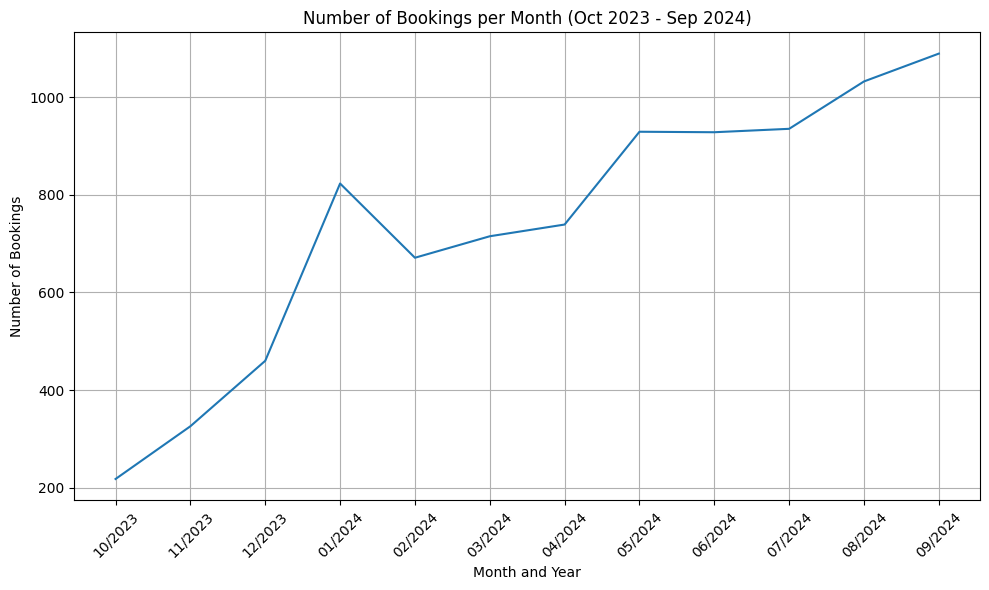

In [73]:
# prompt: plot booking base on month and year

import matplotlib.pyplot as plt
# Filter bookings for the specified period
filtered_bookings = bookings[((bookings['Year'] == 2023) & (bookings['Month'] >= 10)) |
                             ((bookings['Year'] == 2024) & (bookings['Month'] <= 9))]

# Group by month and year and count the bookings
bookings_by_month = filtered_bookings.groupby(['Year', 'Month'])['Appointment Date'].count()

# Create a plot
plt.figure(figsize=(10, 6))

# Correct index for plotting
bookings_by_month.index = bookings_by_month.index.map(lambda x: f'{x[1]:02d}/{x[0]}')

plt.plot(bookings_by_month.index, bookings_by_month.values)
plt.xlabel('Month and Year')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Month (Oct 2023 - Sep 2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
visits = visits_filtered
visits.keys()

Index(['id', 'clinic_id', 'country_id', 'province_id', 'ip', 'source',
       'client', 'from_url', 'location', 'created_at', 'Year', 'Month', 'Day',
       'Time'],
      dtype='object')

# VISITS AND BOOKINGS

<ipython-input-75-fa22e29f71c5>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(visits_by_month.index, rotation=45)


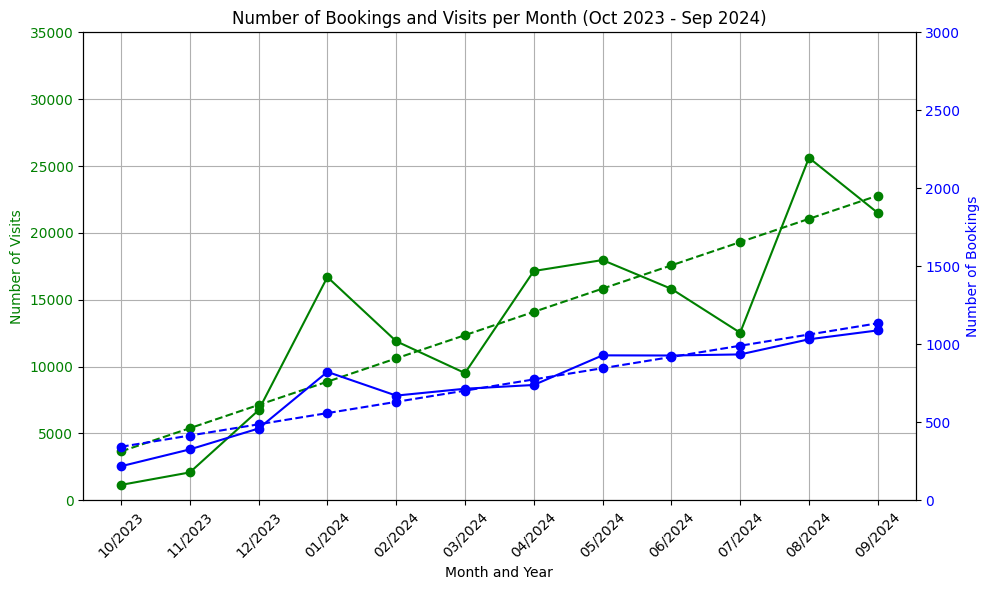

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Filter bookings for the specified period
filtered_bookings = bookings[((bookings['Year'] == 2023) & (bookings['Month'] >= 10)) |
                             ((bookings['Year'] == 2024) & (bookings['Month'] <= 9))]

# Group by month and year and count the bookings
bookings_by_month = filtered_bookings.groupby(['Year', 'Month'])['Appointment Date'].count()

# Filter visits for the specified period
filtered_visits = visits[((visits['Year'] == 2023) & (visits['Month'] >= 10)) |
                         ((visits['Year'] == 2024) & (visits['Month'] <= 9))]

# Group by month and year and count the visits
visits_by_month = filtered_visits.groupby(['Year', 'Month'])['ip'].count()

# Correct index for plotting
bookings_by_month.index = bookings_by_month.index.map(lambda x: f'{x[1]:02d}/{x[0]}')
visits_by_month.index = visits_by_month.index.map(lambda x: f'{x[1]:02d}/{x[0]}')

# Create numeric x values for the trend line
x_values = np.arange(len(visits_by_month))

# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot visits on the primary y-axis (left), with dots at the data points
ax1.plot(visits_by_month.index, visits_by_month.values, color='green', marker='o', label='Visits')
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('Number of Visits', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 35000)  # Set the limit for the number of visits
ax1.set_xticklabels(visits_by_month.index, rotation=45)

# Create a polynomial trend line for visits
visits_trend = np.poly1d(np.polyfit(x_values, visits_by_month.values, 1))(x_values)
ax1.plot(visits_by_month.index, visits_trend, 'g--', label='Visits Trend', marker='o')

# Create a secondary y-axis to plot bookings (on the right), with dots at the data points
ax2 = ax1.twinx()
ax2.plot(bookings_by_month.index, bookings_by_month.values, color='blue', marker='o', label='Bookings')
ax2.set_ylabel('Number of Bookings', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, 3000)  # Set the limit for the number of bookings

# Create a polynomial trend line for bookings
bookings_trend = np.poly1d(np.polyfit(x_values, bookings_by_month.values, 1))(x_values)
ax2.plot(bookings_by_month.index, bookings_trend, 'b--', label='Bookings Trend', marker='o')

# Add titles and grid
plt.title('Number of Bookings and Visits per Month (Oct 2023 - Sep 2024)')
ax1.grid(True)

# Show the plot
plt.savefig('Figure3.png')
plt.tight_layout()
plt.show()


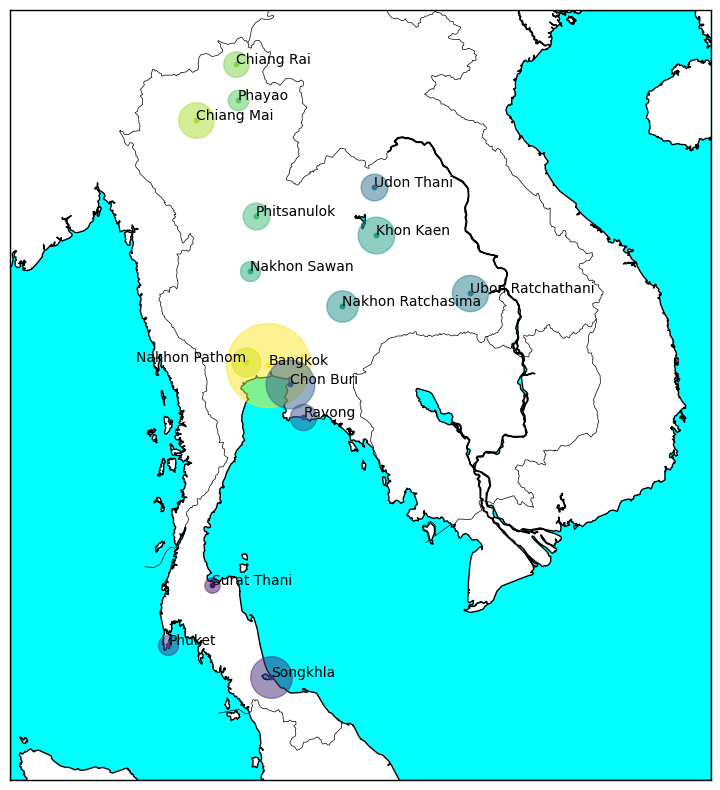

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Province booking counts
province_booking_counts = {
    'Bangkok': 13334,
    'Nakhon Pathom': 188,
    'Chiang Mai': 431,
    'Chiang Rai': 113,
    'Phayao': 48,
    'Phitsanulok': 138,
    'Nakhon Sawan': 43,
    'Khon Kaen': 482,
    'Nakhon Ratchasima': 260,
    'Ubon Ratchathani': 461,
    'Udon Thani': 137,
    'Chon Buri': 1517,
    'Rayong': 128,
    'Phuket': 43,
    'Songkhla': 808,
    'Surat Thani': 15
}

# Province coordinates
province_coordinates = {
    'Bangkok': (13.76189621800438, 100.53078462312983),
    'Nakhon Pathom': (13.8199204, 100.0443492),
    'Chiang Mai': (18.7883439, 98.9853008),
    'Chiang Rai': (19.9104798, 99.840576),
    'Phayao': (19.1868113, 99.8785634),
    'Phitsanulok': (16.821198, 100.265892),
    'Nakhon Sawan': (15.704035, 100.137249),
    'Khon Kaen': (16.4320193, 102.8230865),
    'Nakhon Ratchasima': (14.979899, 102.097769),
    'Ubon Ratchathani': (15.2442297, 104.8478182),
    'Udon Thani': (17.4156701, 102.7858827),
    'Chon Buri': (13.3611431, 100.9846717),
    'Rayong': (12.681416, 101.277081),
    'Phuket': (7.8804479, 98.3923372),
    'Songkhla': (7.189651, 100.595725),
    'Surat Thani': (9.1417036, 99.3295232)
}

# Create a map of Thailand
plt.figure(figsize=(12, 10))
m = Basemap(projection='merc', llcrnrlat=5, urcrnrlat=21, llcrnrlon=95, urcrnrlon=110, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='white', lake_color='aqua')

# Color and size settings for markers
colors = plt.cm.viridis_r
sizes = [count / 10 for count in province_booking_counts.values()]

# Plot each province's booking count with colorful bubbles and labels
for idx, (province, count) in enumerate(province_booking_counts.items()):
    if province in province_coordinates:
        lat, lon = province_coordinates[province]
        x, y = m(lon, lat)
        size = count / 10
        m.scatter(x, y, s=(size**(1/2)) * 100, color=colors(idx / len(province_booking_counts)), alpha=0.5 , zorder=5)
        m.scatter(x, y, s=10, color=colors(idx / len(province_booking_counts)), alpha=1 , zorder=5)
        if province == "Nakhon Pathom":
          plt.text(x , y, province, fontsize=10, ha='right', color='black', zorder=10)
        else:
          plt.text(x , y, province, fontsize=10, ha='left', color='black', zorder=10)

plt.show()


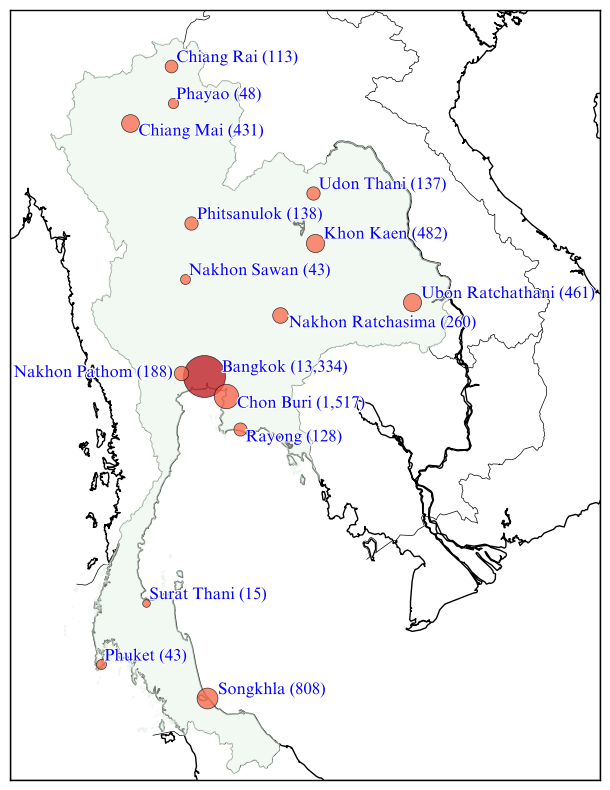

In [77]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from matplotlib.font_manager import FontProperties
from matplotlib.patheffects import withStroke

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


# Province booking counts
province_booking_counts = {
    'Bangkok': 13334,
    'Nakhon Pathom': 188,
    'Chiang Mai': 431,
    'Chiang Rai': 113,
    'Phayao': 48,
    'Phitsanulok': 138,
    'Nakhon Sawan': 43,
    'Khon Kaen': 482,
    'Nakhon Ratchasima': 260,
    'Ubon Ratchathani': 461,
    'Udon Thani': 137,
    'Chon Buri': 1517,
    'Rayong': 128,
    'Phuket': 43,
    'Songkhla': 808,
    'Surat Thani': 15
}

# Province coordinates
province_coordinates = {
    'Bangkok': (13.76189621800438, 100.53078462312983),
    'Nakhon Pathom': (13.8199204, 100.0443492),
    'Chiang Mai': (18.7883439, 98.9853008),
    'Chiang Rai': (19.9104798, 99.840576),
    'Phayao': (19.1868113, 99.8785634),
    'Phitsanulok': (16.821198, 100.265892),
    'Nakhon Sawan': (15.704035, 100.137249),
    'Khon Kaen': (16.4320193, 102.8230865),
    'Nakhon Ratchasima': (14.979899, 102.097769),
    'Ubon Ratchathani': (15.2442297, 104.8478182),
    'Udon Thani': (17.4156701, 102.7858827),
    'Chon Buri': (13.3611431, 100.9846717),
    'Rayong': (12.681416, 101.277081),
    'Phuket': (7.8804479, 98.3923372),
    'Songkhla': (7.189651, 100.595725),
    'Surat Thani': (9.1417036, 99.3295232)
}

# Set up figure and configure basemap for Thailand
plt.figure(figsize=(12, 10))
map_projection = Basemap(projection='merc',
                         llcrnrlat=5.5, urcrnrlat=21,
                         llcrnrlon=96.5, urcrnrlon=108.75,
                         resolution='i')

# Draw map features
map_projection.drawcoastlines()
map_projection.drawcountries()
map_projection.drawmapboundary(fill_color='white')  # Set soft blue background for water
map_projection.fillcontinents(color='white', lake_color='white')  # Set soft beige for land

# Load Thailand provincial boundaries shapefile using GeoPandas
# thailand_shapefile = gpd.read_file('/content/tha_admbnda_adm0_rtsd_20190221.shp')

thailand_shapefile = gpd.read_file("/content/drive/MyDrive/Health Service Recommendations/Booking July 2024 /Data Analysis/tha_admbnda_adm0_rtsd_20190221/tha_admbnda_adm0_rtsd_20190221.shp")
# Set up the colormap for province boundaries
color_map = plt.cm.viridis_r

# Plot each provincial boundary on the basemap
ax = plt.gca()
for idx, geometry in enumerate(thailand_shapefile['geometry']):
    assigned_color = color_map(idx / len(thailand_shapefile))

    if isinstance(geometry, Polygon):
        # Extract and map polygon coordinates
        x, y = geometry.exterior.xy
        x_map, y_map = map_projection(x, y)
        plt.fill(x_map, y_map, color='#e6f5e6', alpha=0.5, zorder=3)  # Softer boundary color
    elif isinstance(geometry, MultiPolygon):
        # Handle MultiPolygon case
        for polygon in geometry.geoms:
            x, y = polygon.exterior.xy
            x_map, y_map = map_projection(x, y)
            plt.fill(x_map, y_map, color='#e6f5e6', alpha=0.5, zorder=3)

# Set up the colormap for the bubbles to range from light red to dark red
# Set up the colormap for the bubbles to range from light red to dark red
# bubble_color_map = plt.cm.YlOrBr
bubble_color_map = plt.cm.Reds

# Color and size settings for province markers
sizes = [count / 10 for count in province_booking_counts.values()]

font_path = '/content/drive/MyDrive/Health Service Recommendations/Booking July 2024 /Data Analysis/Times New Roman/times new roman.ttf'
font_prop = FontProperties(fname=font_path, size=12)

# Plotting provincial booking counts with markers
for idx, (province, count) in enumerate(province_booking_counts.items()):
    if province in province_coordinates:
        # Extract latitude and longitude for each province
        lat, lon = province_coordinates[province]
        x, y = map_projection(lon, lat)
        # Scale size based on booking counts for visibility
        size = count / 10
        # Assign bubble color from the red to pink color map (lower color intensity starts at half red)
        bubble_color = bubble_color_map(0.5 + 0.3 * min(1, count / max(province_booking_counts.values())))
        # Plotting bubbles to represent booking counts
        map_projection.scatter(x, y, s=(size**(1/2)) * 25,
                               color=bubble_color, alpha=0.75, zorder=5, edgecolor='k', linewidth=0.5)
        if province == "Bangkok":
          label = f"{province} (13,334)"
        elif province == "Chon Buri":
          label = f"{province} (1,517)"
        else:
          label = f"{province} ({count})"


        if count < 50:
          adjust = 7500
        elif count < 200:
          adjust = 12500
        elif count < 500:
          adjust = 20000
        elif count < 2000:
          adjust = 25000
        else:
          adjust = 40000

        if province in ["Nakhon Pathom"]:
          text = plt.text(x-20000, y, label, fontproperties=font_prop, ha='right', va='center', color='blue', zorder=10, weight='bold')
          text.set_path_effects([withStroke(linewidth=2, foreground='white')])
        elif province in ["Nakhon Ratchasima", "Chon Buri", "Rayong", "Chiang Mai"]:
          text = plt.text(x+adjust, y, label, fontproperties=font_prop, ha='left', va='top', color='blue', zorder=10, weight='bold')
          text.set_path_effects([withStroke(linewidth=1.5, foreground='white')])
        elif province in ["Bangkok"]:
          text = plt.text(x+adjust, y, label, fontproperties=font_prop, ha='left', va='bottom', color='blue', zorder=10, weight='bold')
          text.set_path_effects([withStroke(linewidth=1.5, foreground='white')])
        else:
          text = plt.text(x+adjust, y, label, fontproperties=font_prop, ha='left',  va='bottom', color='blue', zorder=10, weight='bold')
          text.set_path_effects([withStroke(linewidth=1.5, foreground='white')])


plt.savefig('map.png')
plt.show()

In [78]:
# prompt: save image plt

import matplotlib.pyplot as plt
plt.savefig('map_plot.png')
# Download the image
from google.colab import files
files.download('map_plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>